## ** Understanding and Optimizing City-Bike rides in New York **

### We will start by understanding our data

In [1]:
import numpy as np
import pandas as pd

#in case of not having the csv in the local directory, please use the link below to get the Zip file
#and store it in a convenient and accessible location
#url = "https://s3.amazonaws.com/tripdata/201701-citibike-tripdata.csv.zip"
data = pd.read_csv("201701-citibike-tripdata.csv")
data.rename(columns={'Birth Year': 'Birth_Year','Trip Duration':'TripDuration'},inplace=True)
data.head(5)


,TripDuration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth_Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


### * This information is interesting, but we are missing two more variables and common units: Distance in miles and Speed in miles/h *

## Let's utilize some useful libraries and compute distances ..

In [2]:
from geopy.distance import vincenty as vct

In [3]:
orig_lat = data['Start Station Latitude']
orig_long = data['Start Station Longitude']
dst_lat = data['End Station Latitude']
dst_long = data['End Station Longitude']

#Series(np.random.randn(sLength), index=df1.index)
distList = []
speedList = []




for i in range(len(orig_lat)):
    dist=vct((orig_lat[i],orig_long[i]),(dst_lat[i],dst_long[i])).miles
    distList.append(dist)
    if data['TripDuration'][i]>0:
        speedList.append(dist/data['TripDuration'][i]*3600)
    else:
        speedList.append(0)
    

 

In [4]:
### Reorganizing the data and preparing our analysis

In [5]:

headers =  ["Distance","Speed"]
Data1 = pd.DataFrame(np.column_stack([distList,speedList]), columns=headers)
data=data.join(Data1)


In [6]:
MeanDist = np.mean(data['Distance'])
MedianSpeed = np.median(data['Speed'])
data.describe()


,TripDuration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth_Year,Gender,Distance,Speed
count,7.266760e+05,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,726676.000000,697600.000000,726676.000000,726676.000000,726676.000000
mean,7.778989e+02,1222.917630,40.737372,-73.984795,1197.252902,40.737077,-73.985133,21713.053902,1977.122481,1.166728,1.033485,5.879230
std,1.124683e+04,1277.955252,0.072596,0.123776,1266.085070,0.072474,0.123782,4199.313576,11.925020,0.475971,0.784197,1.858420
min,6.100000e+01,72.000000,0.000000,-74.031372,72.000000,0.000000,-74.033459,14529.000000,1885.000000,0.000000,0.000000,0.000000
25%,3.310000e+02,358.000000,40.720874,-73.995299,356.000000,40.720828,-73.995960,17859.000000,1969.000000,1.000000,0.512482,4.878253
50%,5.260000e+02,482.000000,40.739355,-73.987167,479.000000,40.739323,-73.987586,21295.000000,1979.000000,1.000000,0.817201,5.941741
75%,8.600000e+02,3092.000000,40.755103,-73.976682,3078.000000,40.755003,-73.976806,25803.000000,1987.000000,1.000000,1.303682,7.031356
max,5.325688e+06,3446.000000,40.804213,0.000000,3447.000000,40.804213,0.000000,27325.000000,2000.000000,2.000000,9.153687,17.456254


Prior to go into more detailed analysis we can report that in January 2017:

- The total number of trips was 726,676
- The mean traveled distance was 1.033 Miles
- Only 25% of them traveled more than 1.3 Miles and 50% traveled less than 0.81 Miles
- The maximum traveled distance was 9.15 Miles
- The maximum average speed was 17.46 Miles/h and only 25% went faster tha 7.031 Miles/h

- The median of the rental period is around 8.8 minutes

- In summary, bikes were mainly used to travel short distances and people in general prefer to go slow and avoid  speeding during their trips.
- Surprisingly, the duration of the rentals is not normally distributed but skewed, so we can report a mean close to 13 min and a median of 8.8 minutes

- According to this result the proportion of males is around 3 times that of women, with a median age around 25 years old for both males and females

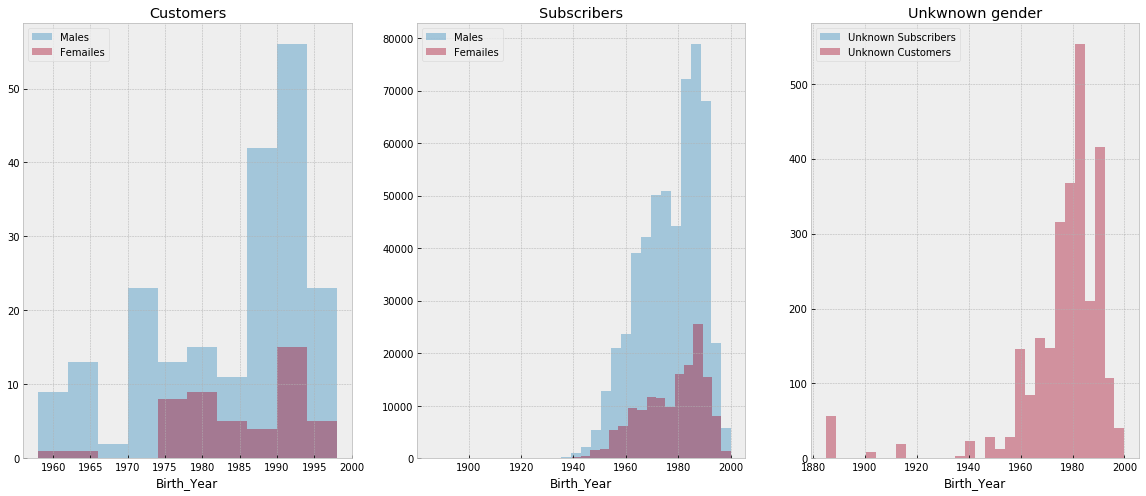

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

%matplotlib inline


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
customers = data[data['User Type'] == 'Customer']
subscribers = data[data['User Type'] == 'Subscriber']


male_lab = 'Males'
fem_lab = 'Femailes'

unk_S ='Unknown Customers'
unk_C = 'Unknown Subscribers'




ax = sns.distplot(customers[customers['Gender'] == 1].Birth_Year.dropna(
), bins=10, label=male_lab, ax=axes[0], kde=False)
ax = sns.distplot(customers[customers['Gender'] == 2].Birth_Year.dropna(
), bins=10, label=fem_lab, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Customers')




ax = sns.distplot(subscribers[subscribers['Gender'] == 1].Birth_Year.dropna(),
                  bins=30, label=male_lab, ax=axes[1], kde=False)
ax = sns.distplot(subscribers[subscribers['Gender'] == 2].Birth_Year.dropna(),
                  bins=30, label=fem_lab, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Subscribers');

ax = sns.distplot(customers[customers['Gender'] == 0].Birth_Year.dropna(
), bins=30, label=unk_C, ax=axes[2], kde=False)
ax = sns.distplot(subscribers[subscribers['Gender'] == 0].Birth_Year.dropna(
), bins=30, label=unk_S, ax=axes[2], kde=False)
ax.legend()
ax.set_title('Unkwnown gender');


In [8]:
 duration = data['TripDuration']
duration=duration/60 #here I calculate the trip duration in minutes
print( "the mean and median duration of the trips is ", np.mean(duration) ,"and", np.median(duration),"minutes")


the mean and median duration of the trips is  12.964981780050595 and 8.766666666666667 minutes


Text(0,0.5,'Number of rentals')

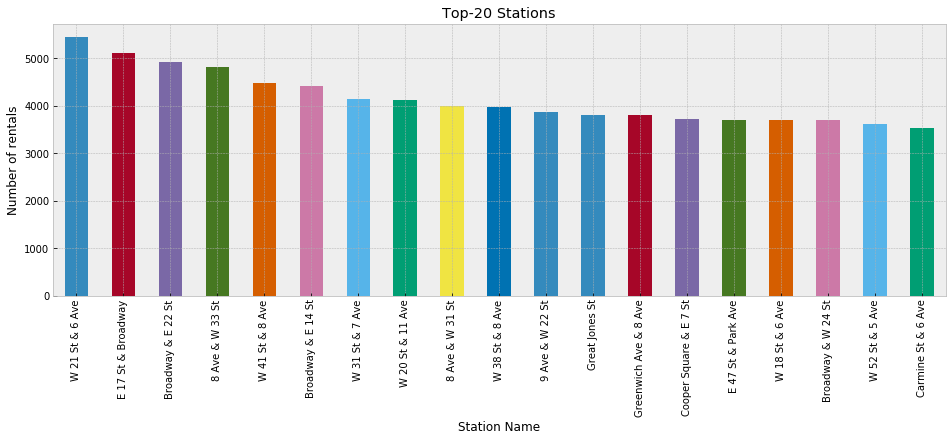

In [9]:
popularStations = data['Start Station Name'].value_counts()


fig1, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,11))

plt.subplot(2,1,1)
popularStations[1:20].plot.bar()
plt.title("Top-20 Stations")
plt.xlabel("Station Name")
plt.ylabel("Number of rentals")


Text(0.5,1,'Subscribers')

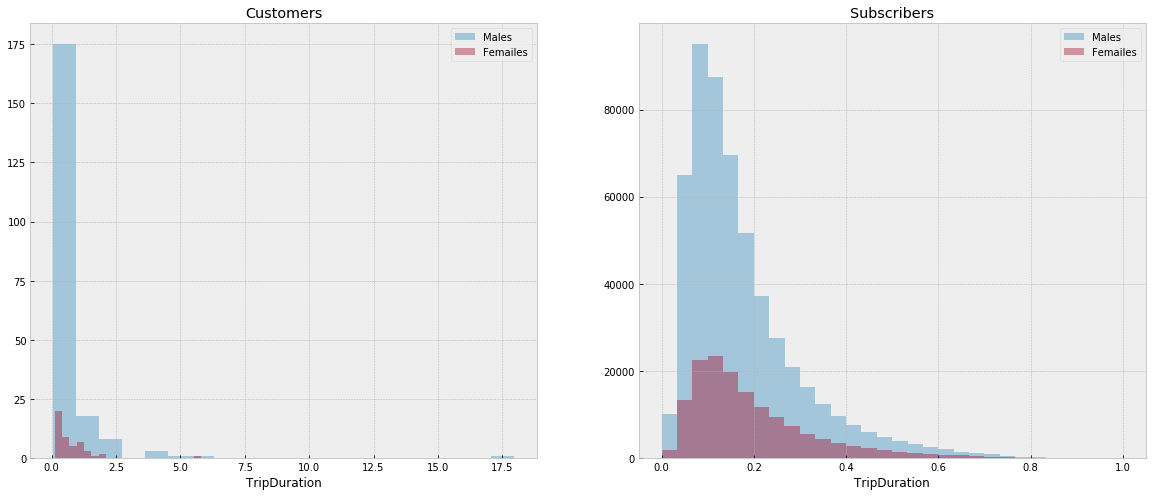

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
customers = data[data['User Type'] == 'Customer']
subscribers = data[data['User Type'] == 'Subscriber']


male_lab = 'Males'
fem_lab = 'Femailes'

unk_S ='Unknown Customers'
unk_C = 'Unknown Subscribers'


ax = sns.distplot(customers[customers['Gender'] == 1].TripDuration.apply(lambda x: x/3600).dropna(
), bins=20, label=male_lab, ax=axes[0], kde=False)
ax = sns.distplot(customers[customers['Gender'] == 2].TripDuration.apply(lambda x: x/3600).dropna(
), bins=20, label=fem_lab, ax=axes[0], kde=False)

ax.legend()
ax.set_title('Customers')

ax = sns.distplot(subscribers[subscribers['Gender'] == 1].TripDuration.apply(lambda x: x/3600 if x<3600 else 0).dropna(
), bins=30, label=male_lab, ax=axes[1], kde=False)
ax = sns.distplot(subscribers[subscribers['Gender'] == 2].TripDuration.apply(lambda x: x/3600 if x<3600 else 0).dropna(
), bins=30, label=fem_lab, ax=axes[1], kde=False)

ax.legend()
ax.set_title('Subscribers')








                
        

#sns.violinplot(x='Gender', y='Birth_Year', hue='Distance (Miles)', data=data, split=True)


#### In the figure time is given in hours. In general, women use the bike less than men and tend to use it for shorther periods with a median close to 6 minutes in the cse of both subscribers and  customers. Men in turn prefer longer periods with a median close to 9 minutes for subscribers and 45 minutes for customers

In [11]:

popularTrips = data.groupby(['Start Station Name', 'End Station Name']).size()
popularTrips.sort_values(ascending=False)[0:10]


Start Station Name            End Station Name            
E 7 St & Avenue A             Cooper Square & E 7 St          440
W 21 St & 6 Ave               9 Ave & W 22 St                 367
Greenwich Ave & Charles St    Greenwich Ave & Charles St      355
E 33 St & 2 Ave               W 33 St & 7 Ave                 318
Pershing Square North         E 24 St & Park Ave S            305
N 6 St & Bedford Ave          Wythe Ave & Metropolitan Ave    295
Pershing Square North         Broadway & W 32 St              293
                              W 33 St & 7 Ave                 277
Wythe Ave & Metropolitan Ave  N 6 St & Bedford Ave            255
Richardson St & N Henry St    Graham Ave & Conselyea St       253
dtype: int64

In [12]:
def age(x):
    if x < 1960:
        return 1
    if x >= 1960 and x<1980:
        return 2
    if x >= 1980 :   
        return 3
    else:
        x = 3
    
def dist_group(x):
    if x < MeanDist:
        return "long"    
    if x >= MeanDist :   
        return "short"
    



Gender = data['Gender']
Age = data['Birth_Year'].apply(age)
tripDist = data['Distance']
tripSpeed = data['Speed']
tripDuration = data["TripDuration"]
headers =  ["Gender","Age_Group","Distance","Speed","RentalPeriod" ]
Data1 = pd.DataFrame(np.column_stack([Gender,Age,tripDist,tripSpeed,tripDuration]), columns=headers)






[Text(0,0.5,'Distance (Miles)'),
 [Text(0,0,'Seniors'), Text(0,0,'Adults'), Text(0,0,'Young Adults')]]

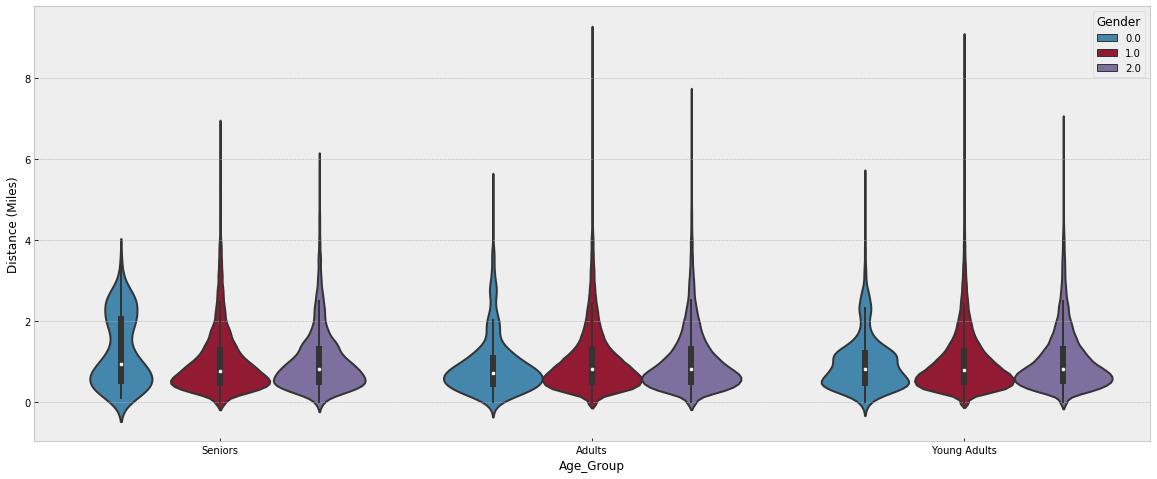

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
gend_lab =["unknown","Male","Female"]
graph_=sns.violinplot(x='Age_Group', y='Distance', hue='Gender', data=Data1, split=False)
graph_.set(xticklabels=["Seniors","Adults","Young Adults"],ylabel = "Distance (Miles)")




"Genders correspond to (0) Unknown, (1) Male,(2) Female"

[Text(0,0.5,'Speed (Miles/h)'),
 [Text(0,0,'Seniors'), Text(0,0,'Adults'), Text(0,0,'Young Adults')]]

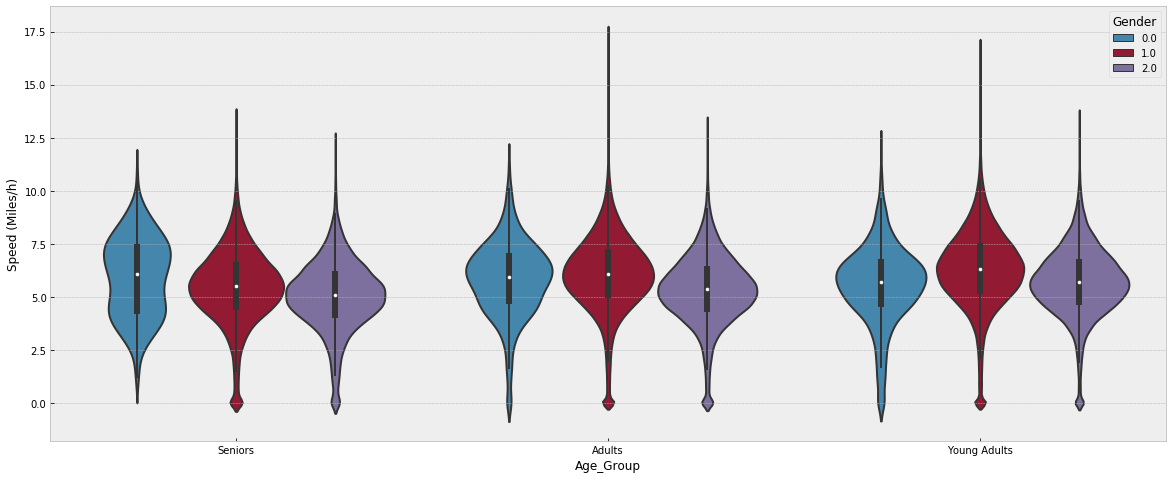

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
gend_lab =["unknown","Male","Female"]
graph_=sns.violinplot(x='Age_Group', y='Speed', hue='Gender', data=Data1, split=False)
graph_.set(xticklabels=["Seniors","Adults","Young Adults"],ylabel = "Speed (Miles/h)")

The most popular (busiest bike) in January 2017 was:

Text(0,0.5,'Number of rentals')

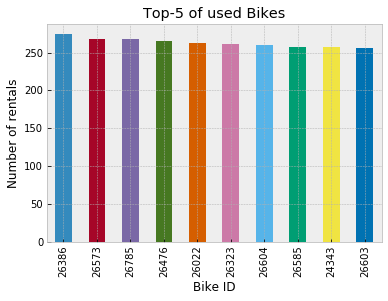

In [73]:
popularBikes = data.groupby(['Bike ID']).size()
popularBikes.sort_values(ascending=False).head(10).plot.bar()
plt.title("Top-5 of used Bikes")
plt.xlabel("Bike ID")
plt.ylabel("Number of rentals")

In [133]:
popularBikes = data.groupby(['Bike ID']).size()
popularBikes.sort_values(ascending=False).head(10)

Bike ID
26386    274
26573    268
26785    268
26476    266
26022    263
26323    261
26604    260
26585    258
24343    258
26603    256
dtype: int64

Let's start by performing some basic cleaining of the data ...

In [149]:
Data2= Data1[pd.notnull(Data1['Age_Group'])]

And to define the classes for our problem we will use 5 values for Rental Period (RT)
- A if RT<= 3 min then class =0
- B if RT > 3 min and RT<=5min then class =1
- C if RT> 5 min and RT<= 8min then class =2
- D if RT> 8 min and RT<= 15min then class =3
- E if RT> 15 min and RT<= 60min then class =4
- F if RT> 60 min  then class =5


In [150]:
def Rental_Class(duration):
    x=duration/60
    if x<= 3: 
        return "A"
    if x > 3 and x<=5:
        return "B"
    if x > 5 and x<=8:
        return "C"
    if x > 8 and x<=15:
        return "D"
    if x > 15 and x<=60:
        return "E"
    if x > 60:   
        return "F"
    

In [151]:
Data2["RentalPeriod"]=Data2["RentalPeriod"].apply(Rental_Class)

C:\Users\PanteraDorada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## The model: A linear Classifier

In [152]:
from sklearn import datasets
from sklearn.metrics import roc_curve, log_loss, accuracy_score
X = Data2[["Gender","Age_Group","Distance","Speed"]]
y = Data2["RentalPeriod"]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


#Given the relations found among ourvariables we will be using a simple
# linear model to start with C=1/lambda = 1000
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5, random_state=0)

#Here we train the model
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

# And to evaluate our method we add some metrics

y_pred_proba = lr.predict_proba(X_test)[:, 1]

print('Train/Test split results:')
print("the"+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
#print("the"+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba]))


    





C:\Users\PanteraDorada\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Train/Test split results:
the accuracy is 0.784
